In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('./german_credit_data.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
df.isnull().sum() / len(df)

Unnamed: 0          0.000
Age                 0.000
Sex                 0.000
Job                 0.000
Housing             0.000
Saving accounts     0.183
Checking account    0.394
Credit amount       0.000
Duration            0.000
Purpose             0.000
Risk                0.000
dtype: float64

In [8]:
# per column categorical value counts for object type columns
for col in df.select_dtypes(include='object').columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")

Column: Sex
Sex
male      690
female    310
Name: count, dtype: int64


Column: Housing
Housing
own     713
rent    179
free    108
Name: count, dtype: int64


Column: Saving accounts
Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64


Column: Checking account
Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64


Column: Purpose
Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64


Column: Risk
Risk
good    700
bad     300
Name: count, dtype: int64




# EDA

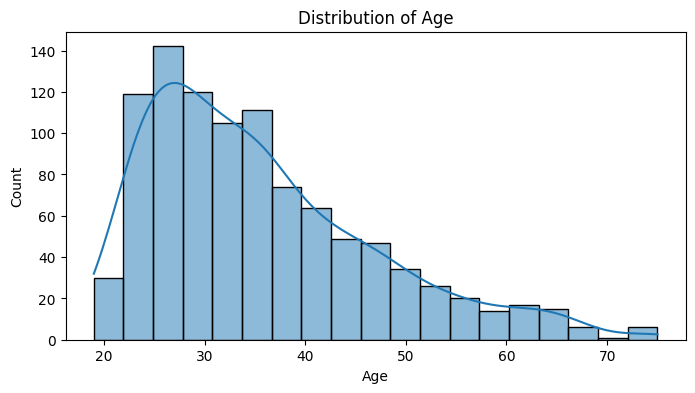

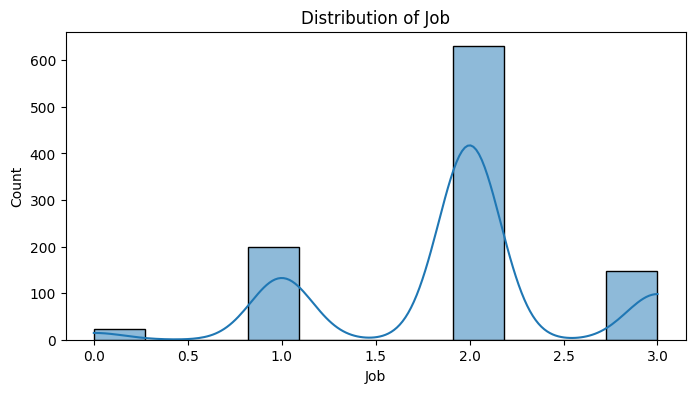

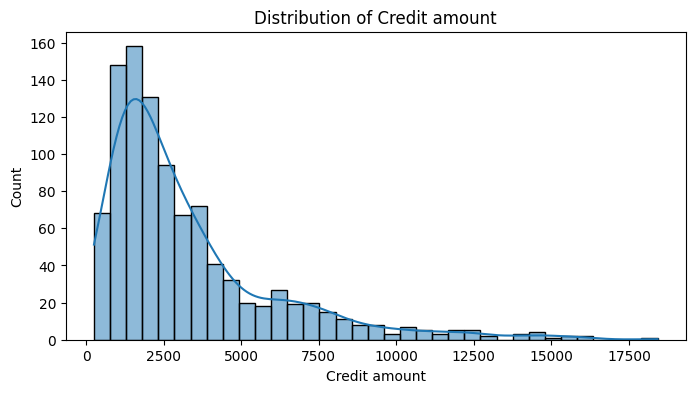

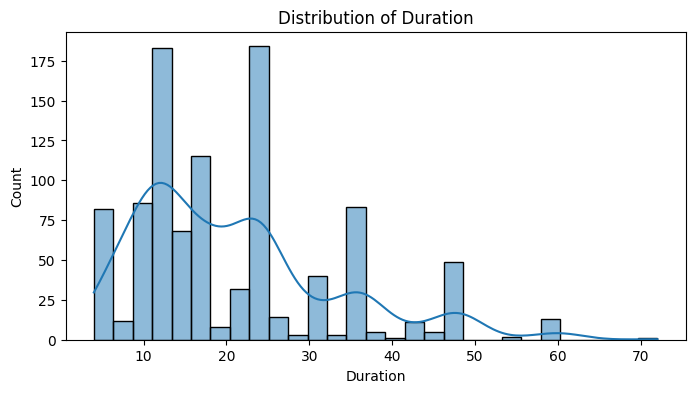

In [9]:
# delete Unnamed: 0 column
df = df.drop(columns=['Unnamed: 0'])
# per column distribution for numerical columns
for col in df.select_dtypes(include=np.number).columns: 
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

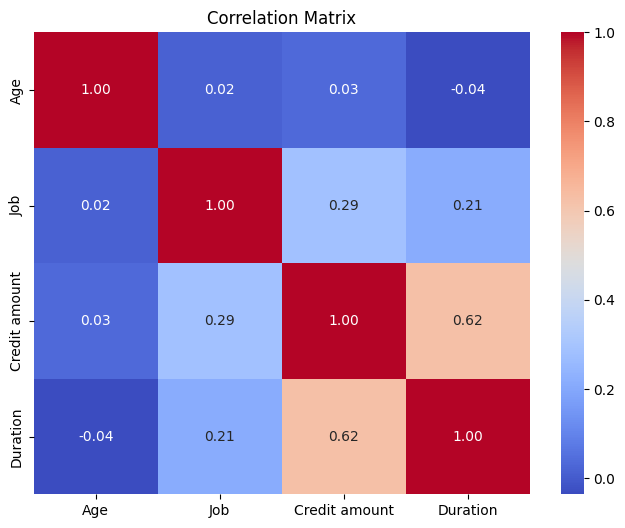

In [10]:
corr = df[['Age', 'Job', 'Credit amount', 'Duration']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [11]:
cols_name =['Sex','Job','Housing','Saving accounts','Checking account','Purpose']

C:\Users\Hasan\AppData\Local\Temp\ipykernel_14968\823412831.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)
C:\Users\Hasan\AppData\Local\Temp\ipykernel_14968\823412831.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)
C:\Users\Hasan\AppData\Local\Temp\ipykernel_14968\823412831.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)
C

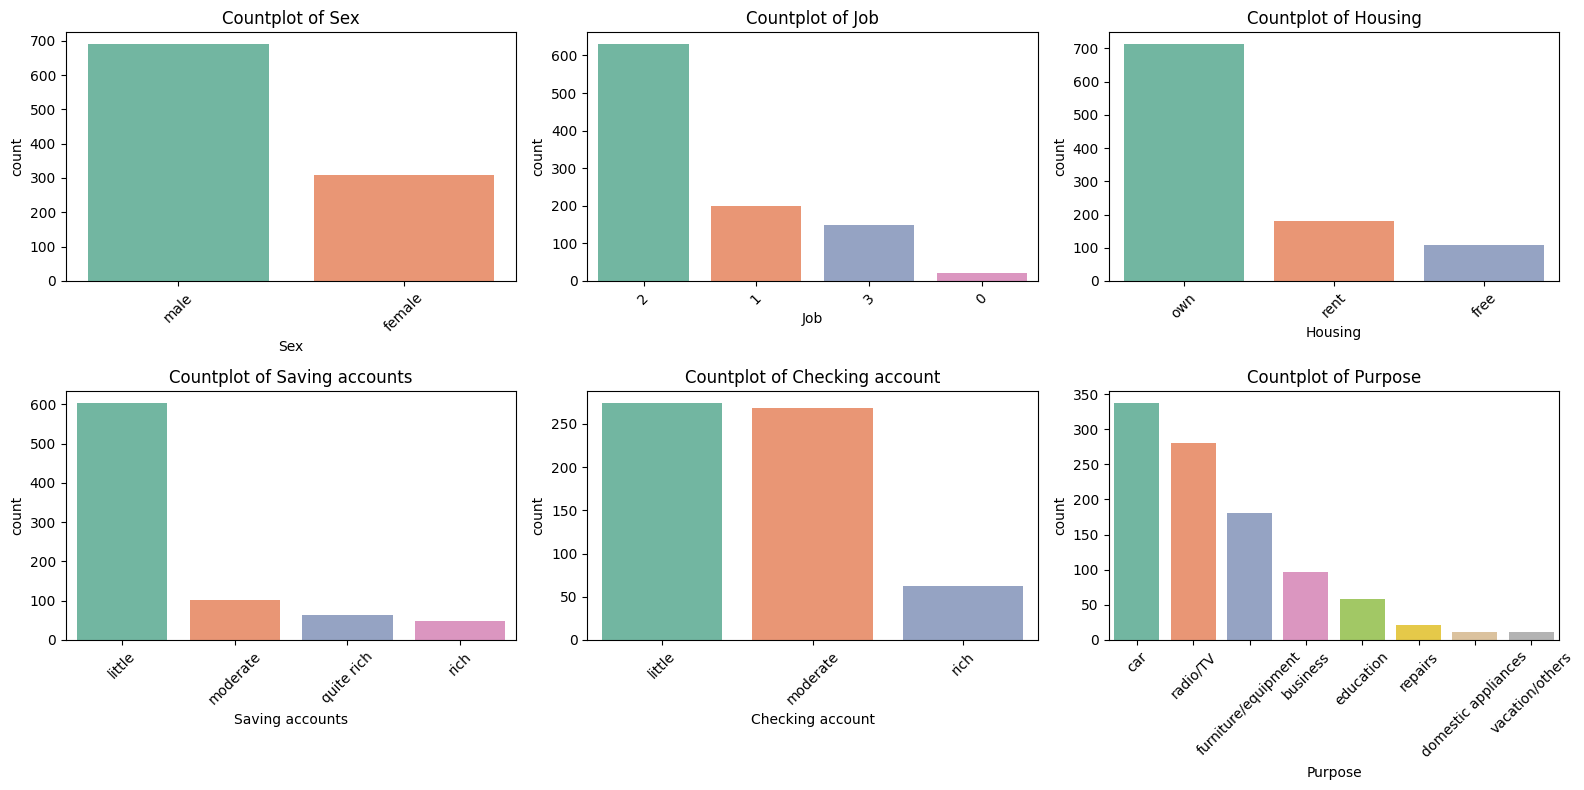

In [12]:
plt.figure(figsize=(16, 8))
for i, col in enumerate(cols_name):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Risk,1000,2,good,700,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df['Credit amount'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: Credit amount, dtype: float64

In [15]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


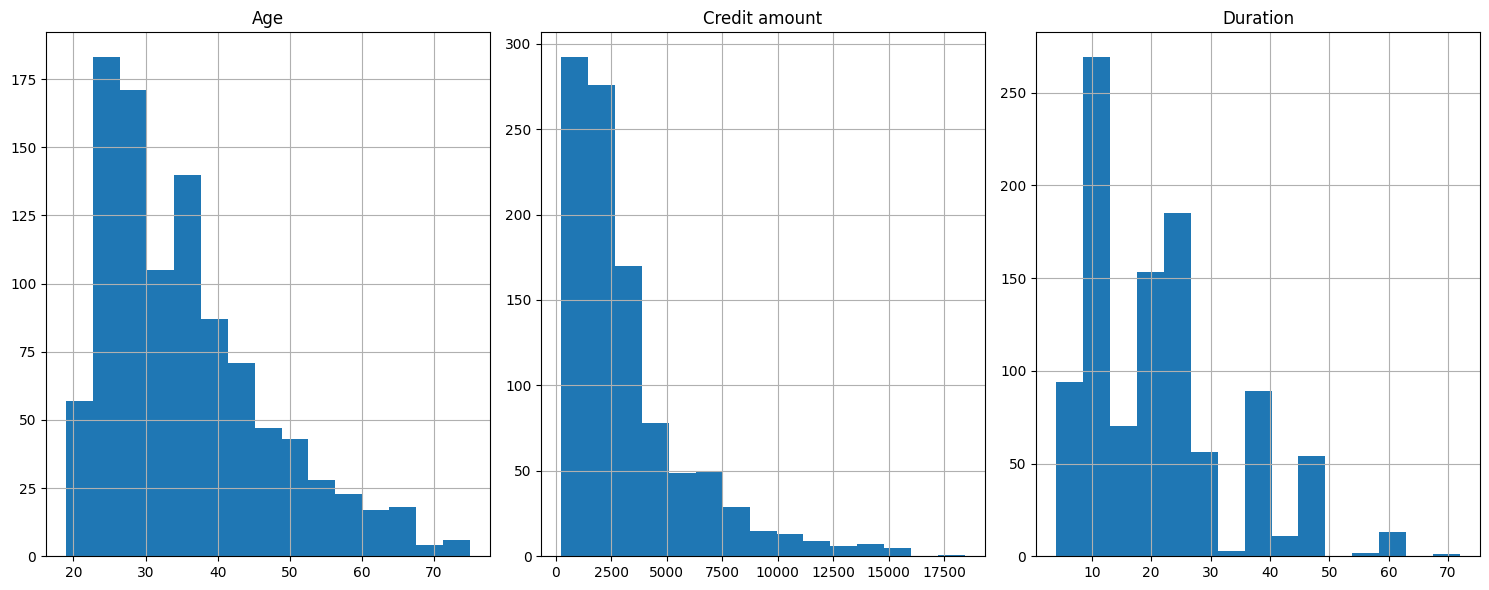

In [16]:
df[['Age', 'Credit amount', 'Duration']].hist(bins=15, figsize=(15, 6), layout=(1, 3))
plt.tight_layout()

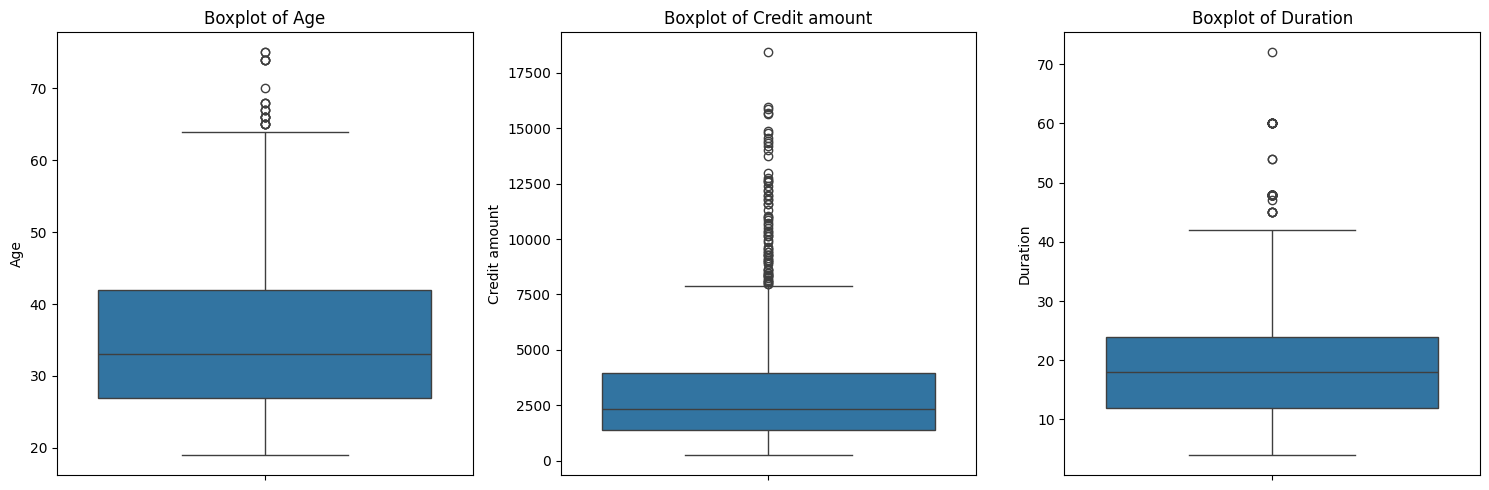

In [17]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Age', 'Credit amount', 'Duration']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


In [18]:
df.query('`Duration` >= 60')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
29,63,male,2,own,little,little,6836,60,business,bad
134,21,female,2,own,moderate,NaN,10144,60,radio/TV,good
255,27,male,1,own,NaN,moderate,7418,60,radio/TV,good
332,24,female,3,own,moderate,moderate,7408,60,car,bad
373,63,male,3,free,NaN,NaN,13756,60,car,good
374,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
616,27,male,3,free,NaN,moderate,9157,60,radio/TV,good
637,21,male,2,own,little,NaN,15653,60,radio/TV,good
672,42,male,3,own,little,NaN,10366,60,car,good
677,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [20]:
# all columns names
df.columns.tolist()

['Age',
 'Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Credit amount',
 'Duration',
 'Purpose',
 'Risk']

# Missing Value Impute

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# 1. load the dataset
df = df.copy()

# check missing values in each column
df.isnull().sum().sort_values(ascending=False)

Checking account    394
Saving accounts     183
Age                   0
Sex                   0
Job                   0
Housing               0
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [22]:
df.columns.tolist()

['Age',
 'Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Credit amount',
 'Duration',
 'Purpose',
 'Risk']

In [23]:
# check numerical and categorical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols, categorical_cols


(['Age', 'Job', 'Credit amount', 'Duration'],
 ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk'])

In [24]:
df.shape

(1000, 10)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [26]:
# encode the data using label encoding
from sklearn.preprocessing import LabelEncoder

df['Saving accounts'] = df['Saving accounts'].fillna('Unknown')

# Columns to encode
columns_to_encode = ['Sex', 'Housing','Saving accounts','Purpose', 'Risk']

# Dictionary to store LabelEncoders for each column
label_encoders = {}

# Loop to apply LabelEncoder to each column
for col in columns_to_encode:
    # Create a new LabelEncoder for the column
    le = LabelEncoder()

    # Fit and transform the data, then inverse transform it
    df[col] = le.fit_transform(df[col])

    # Store the encoder in the dictionary
    label_encoders[col] = le

# Check the first few rows of the DataFrame
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,0,little,1169,6,5,1
1,22,0,2,1,1,moderate,5951,48,5,0
2,49,1,1,1,1,NaN,2096,12,3,1
3,45,1,2,0,1,little,7882,42,4,1
4,53,1,2,0,1,little,4870,24,1,0


In [27]:
# Split the dataset into two parts: one with missing values, one without
df_with_missing = df[df['Checking account'].isna()]
# dropna removes all rows with missing values
df_without_missing = df.dropna()

In [28]:
print("The shape of the original dataset is: ", df.shape)
print("The shape of the dataset with missing values removed is: ", df_without_missing.shape)
print("The shape of the dataset with missing values is: ", df_with_missing.shape)

The shape of the original dataset is:  (1000, 10)
The shape of the dataset with missing values removed is:  (606, 10)
The shape of the dataset with missing values is:  (394, 10)


In [29]:
df_with_missing.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
2,49,1,1,1,1,NaN,2096,12,3,1
5,35,1,1,0,0,NaN,9055,36,3,1
6,53,1,2,1,3,NaN,2835,24,4,1
8,61,1,1,1,4,NaN,3059,12,5,1
16,53,1,2,1,0,NaN,2424,24,5,1


In [30]:
df_without_missing.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,0,little,1169,6,5,1
1,22,0,2,1,1,moderate,5951,48,5,0
3,45,1,2,0,1,little,7882,42,4,1
4,53,1,2,0,1,little,4870,24,1,0
7,35,1,3,2,1,moderate,6948,36,1,1


In [31]:
# check the names of the columns
print(df.columns)

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')


# Deep Learning Missing values

In [32]:
# import optuna
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.metrics import accuracy_score, classification_report
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers, regularizers

# # -----------------------------
# # Data Preprocessing
# # -----------------------------
# X = df_without_missing.drop(columns=['Checking account'])
# y = df_without_missing['Checking account']

# # Encode categorical features (not needed, X is already numeric)
# # categorical_cols = X.select_dtypes(include=['object']).columns
# # le = LabelEncoder()
# # for col in categorical_cols:
# #     X[col] = le.fit_transform(X[col])

# # Normalize features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Encode target variable
# le_y = LabelEncoder()
# y_encoded = le_y.fit_transform(y)

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X_scaled, y_encoded, test_size=0.2, random_state=42
# )

# # -----------------------------
# # Optuna Objective Function
# # -----------------------------
# def objective(trial):
#     # Hyperparameters
#     n_layers = trial.suggest_int("n_layers", 1, 3)
#     n_units = trial.suggest_int("n_units", 16, 128)
#     dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5)
#     l2_reg = trial.suggest_float("l2_reg", 1e-5, 1e-2, log=True)
#     learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)
#     optimizer_choice = trial.suggest_categorical("optimizer", ["adam", "sgd", "rmsprop"])

#     # -----------------------------
#     # Model Architecture
#     # -----------------------------
#     model = keras.Sequential()
#     for i in range(n_layers):
#         model.add(layers.Dense(
#             n_units,
#             activation="relu",
#             kernel_initializer="he_normal",   # good init for ReLU
#             kernel_regularizer=regularizers.l2(l2_reg)
#         ))
#         model.add(layers.Dropout(dropout_rate))
    
#     # Output layer (multi-class classification)
#     num_classes = len(np.unique(y))
#     model.add(layers.Dense(num_classes, activation="softmax"))

#     # Optimizer with gradient clipping
#     if optimizer_choice == "adam":
#         optimizer = keras.optimizers.Adam(learning_rate=learning_rate, clipnorm=1.0)
#     elif optimizer_choice == "sgd":
#         optimizer = keras.optimizers.SGD(learning_rate=learning_rate, clipnorm=1.0, momentum=0.9)
#     else:
#         optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate, clipnorm=1.0)

#     model.compile(
#         optimizer=optimizer,
#         loss="sparse_categorical_crossentropy",
#         metrics=["accuracy"]
#     )

#     # Early stopping
#     early_stopping = keras.callbacks.EarlyStopping(
#         monitor="val_loss", patience=5, restore_best_weights=True
#     )

#     # Learning rate scheduler
#     lr_scheduler = keras.callbacks.ReduceLROnPlateau(
#         monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6
#     )

#     # Train
#     history = model.fit(
#         X_train, y_train,
#         validation_split=0.2,
#         epochs=50,
#         batch_size=trial.suggest_categorical("batch_size", [16, 32, 64]),
#         callbacks=[early_stopping, lr_scheduler],
#         verbose=0
#     )

#     # Evaluate
#     _, acc = model.evaluate(X_test, y_test, verbose=0)
#     return acc

# # -----------------------------
# # Run Optuna
# # -----------------------------
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=20)

# print("Best trial:")
# print(study.best_trial.params)

# # -----------------------------
# # Train Final Model
# # -----------------------------
# best_params = study.best_trial.params
# print("Training with best params...")

# # (You can reuse objective() code here to retrain best model)
# # For brevity, we will just call objective again to get the best model
# objective(study.best_trial)

# Machine learning

## GOOD

In [33]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# from sklearn.preprocessing import LabelEncoder

# X = df_without_missing.drop(columns=['Checking account'])
# y = df_without_missing['Checking account']

# # Encode categorical columns before splitting
# categorical_cols = X.select_dtypes(include=['object']).columns
# le = LabelEncoder()
# for col in categorical_cols:
#     X[col] = le.fit_transform(X[col])

# # Split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.20, random_state=42
# )

# # Train Logistic Regression
# rf_model = LogisticRegression(max_iter=1000)
# rf_model.fit(X_train, y_train)

# # Evaluate
# y_pred = rf_model.predict(X_test)
# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

# # Metrics
# print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
# print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
# print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
# print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")


## BEST

In [34]:
# import optuna
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# # -----------------------------
# # Data Preprocessing
# # -----------------------------
# X = df_without_missing.drop(columns=['Checking account'])
# y = df_without_missing['Checking account']

# # Encode categorical features
# categorical_cols = X.select_dtypes(include=['object']).columns
# le = LabelEncoder()
# for col in categorical_cols:
#     X[col] = le.fit_transform(X[col])

# # Normalize
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X_scaled, y, test_size=0.2, random_state=42
# )

# # -----------------------------
# # Optuna Objective Function
# # -----------------------------
# def objective(trial):
#     # Hyperparameters for Logistic Regression
#     penalty = trial.suggest_categorical("penalty", ["l1", "l2", "elasticnet"])
#     C = trial.suggest_float("C", 1e-4, 10.0, log=True)   # regularization strength
#     solver = trial.suggest_categorical("solver", ["saga"])  # saga supports l1 & elasticnet
#     l1_ratio = None
#     if penalty == "elasticnet":
#         l1_ratio = trial.suggest_float("l1_ratio", 0.0, 1.0)

#     model = LogisticRegression(
#         penalty=penalty,
#         C=C,
#         solver=solver,
#         l1_ratio=l1_ratio,
#         max_iter=1000,
#         random_state=42
#     )

#     # Cross-validation accuracy
#     scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
#     return scores.mean()

# # -----------------------------
# # Run Optuna
# # -----------------------------
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=30)

# print("Best Trial Params:", study.best_trial.params)

# # -----------------------------
# # Train Final Model
# # -----------------------------
# best_params = study.best_trial.params
# final_model = LogisticRegression(
#     penalty=best_params["penalty"],
#     C=best_params["C"],
#     solver=best_params["solver"],
#     l1_ratio=best_params.get("l1_ratio"),
#     max_iter=1000,
#     random_state=42
# )
# final_model.fit(X_train, y_train)

# # -----------------------------
# # Evaluate
# # -----------------------------
# y_pred = final_model.predict(X_test)

# print("Classification Report:\n", classification_report(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Precision:", precision_score(y_test, y_pred, average="weighted"))
# print("Recall:", recall_score(y_test, y_pred, average="weighted"))
# print("F1 Score:", f1_score(y_test, y_pred, average="weighted"))


## BETTER

In [35]:
import optuna 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix
)

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")

# -----------------------------
# Data Preprocessing
# -----------------------------
X = df_without_missing.drop(columns=['Checking account'])
y = df_without_missing['Checking account']

# Encode categorical features
categorical_cols = X.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

# Encode target variable
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

# -----------------------------
# Optuna Objective Function
# -----------------------------
def objective(trial):
    model_name = trial.suggest_categorical("model", ["logreg", "rf", "gb", "svm", "xgb", "lgbm"])

    if model_name == "logreg":
        penalty = trial.suggest_categorical("penalty", ["l1", "l2", "elasticnet"])
        C = trial.suggest_float("C", 1e-4, 10.0, log=True)
        solver = "saga"
        l1_ratio = None
        if penalty == "elasticnet":
            l1_ratio = trial.suggest_float("l1_ratio", 0.0, 1.0)
        model = LogisticRegression(
            penalty=penalty, C=C, solver=solver, l1_ratio=l1_ratio,
            max_iter=1000, random_state=42
        )

    elif model_name == "rf":
        n_estimators = trial.suggest_int("n_estimators", 50, 300)
        max_depth = trial.suggest_int("max_depth", 3, 15)
        model = RandomForestClassifier(
            n_estimators=n_estimators, max_depth=max_depth,
            random_state=42
        )

    elif model_name == "gb":
        n_estimators = trial.suggest_int("n_estimators", 50, 300)
        learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3)
        max_depth = trial.suggest_int("max_depth", 3, 10)
        model = GradientBoostingClassifier(
            n_estimators=n_estimators, learning_rate=learning_rate,
            max_depth=max_depth, random_state=42
        )

    elif model_name == "svm":
        C = trial.suggest_float("C", 1e-3, 10.0, log=True)
        kernel = trial.suggest_categorical("kernel", ["linear", "rbf", "poly", "sigmoid"])
        gamma = trial.suggest_categorical("gamma", ["scale", "auto"])
        model = SVC(C=C, kernel=kernel, gamma=gamma, probability=True, random_state=42)

    elif model_name == "xgb":
        n_estimators = trial.suggest_int("n_estimators", 50, 300)
        learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3)
        max_depth = trial.suggest_int("max_depth", 3, 10)
        subsample = trial.suggest_float("subsample", 0.5, 1.0)
        model = XGBClassifier(
            n_estimators=n_estimators, learning_rate=learning_rate,
            max_depth=max_depth, subsample=subsample,
            eval_metric="mlogloss", use_label_encoder=False,
            random_state=42, verbosity=0
        )

    elif model_name == "lgbm":
        n_estimators = trial.suggest_int("n_estimators", 50, 300)
        learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3)
        num_leaves = trial.suggest_int("num_leaves", 20, 100)
        min_child_samples = trial.suggest_int("min_child_samples", 5, 30)
        model = LGBMClassifier(
            n_estimators=n_estimators, learning_rate=learning_rate,
            num_leaves=num_leaves, min_child_samples=min_child_samples,
            random_state=42, verbosity=-1
        )

    # Cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    return scores.mean()

# -----------------------------
# Run Optuna
# -----------------------------
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best Trial Params:", study.best_trial.params)

# -----------------------------
# Train Final Model with Best Params
# -----------------------------
best_params = study.best_trial.params
best_model_name = best_params.pop("model")

if best_model_name == "logreg":
    final_model = LogisticRegression(max_iter=1000, random_state=42, **best_params)
elif best_model_name == "rf":
    final_model = RandomForestClassifier(random_state=42, **best_params)
elif best_model_name == "gb":
    final_model = GradientBoostingClassifier(random_state=42, **best_params)
elif best_model_name == "svm":
    final_model = SVC(probability=True, random_state=42, **best_params)
elif best_model_name == "xgb":
    final_model = XGBClassifier(eval_metric="mlogloss", use_label_encoder=False,
                                random_state=42, verbosity=0, **best_params)
elif best_model_name == "lgbm":
    final_model = LGBMClassifier(random_state=42, verbosity=-1, **best_params)

# Fit model
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

# Decode predictions and true labels for readability
y_test_decoded = le_y.inverse_transform(y_test)
y_pred_decoded = le_y.inverse_transform(y_pred)

# -----------------------------
# Evaluation
# -----------------------------
print("Classification Report:\n", classification_report(y_test_decoded, y_pred_decoded))
print("Confusion Matrix:\n", confusion_matrix(y_test_decoded, y_pred_decoded))
print("Accuracy:", accuracy_score(y_test_decoded, y_pred_decoded))
print("Precision:", precision_score(y_test_decoded, y_pred_decoded, average="weighted"))
print("Recall:", recall_score(y_test_decoded, y_pred_decoded, average="weighted"))
print("F1 Score:", f1_score(y_test_decoded, y_pred_decoded, average="weighted"))


a:\installedSoftware\anaconda3\envs\atlas\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-09-24 09:31:49,874] A new study created in memory with name: no-name-caaef99d-53dc-4446-9119-59ad6e105a4f
[I 2025-09-24 09:31:53,092] Trial 0 finished with value: 0.5248711340206185 and parameters: {'model': 'gb', 'n_estimators': 101, 'learning_rate': 0.18701085281175353, 'max_depth': 3}. Best is trial 0 with value: 0.5248711340206185.
[I 2025-09-24 09:31:53,138] Trial 1 finished with value: 0.47115549828178693 and parameters: {'model': 'logreg', 'penalty': 'l1', 'C': 0.1328566816833512}. Best is trial 0 with value: 0.5248711340206185.
[I 2025-09-24 09:32:03,642] Trial 2 finished with value: 0.5269329896907216 and parameters: {'model': 'lgbm', 'n_estimators': 256, 'learning_rate': 0.12360375000089506, 'num_leaves': 43

Best Trial Params: {'model': 'rf', 'n_estimators': 275, 'max_depth': 8}
Classification Report:
               precision    recall  f1-score   support

      little       0.61      0.79      0.69        58
    moderate       0.64      0.55      0.59        55
        rich       0.00      0.00      0.00         9

    accuracy                           0.62       122
   macro avg       0.42      0.45      0.43       122
weighted avg       0.58      0.62      0.59       122

Confusion Matrix:
 [[46 12  0]
 [25 30  0]
 [ 4  5  0]]
Accuracy: 0.6229508196721312
Precision: 0.5793419369840717
Recall: 0.6229508196721312
F1 Score: 0.594042966625822


In [36]:
# check the number of missing values in each column
df_with_missing.isnull().sum().sort_values(ascending=False)

Checking account    394
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts       0
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [37]:
df_with_missing.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
2,49,1,1,1,1,NaN,2096,12,3,1
5,35,1,1,0,0,NaN,9055,36,3,1
6,53,1,2,1,3,NaN,2835,24,4,1
8,61,1,1,1,4,NaN,3059,12,5,1
16,53,1,2,1,0,NaN,2424,24,5,1


In [38]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df_with_missing.select_dtypes(include=['object']).columns

# Apply same LabelEncoder to both datasets
for col in categorical_cols:
    le = LabelEncoder()
    combined_values = pd.concat([df_without_missing[col], df_with_missing[col]])
    le.fit(combined_values)
    df_without_missing[col] = le.transform(df_without_missing[col])
    df_with_missing[col] = le.transform(df_with_missing[col])

# Features for missing dataset
X_missing = df_with_missing.drop(['Checking account'], axis=1)

# Scale if scaler was used during training
X_missing_scaled = scaler.transform(X_missing)

# Predict missing values
y_pred = final_model.predict(X_missing_scaled)


In [39]:
# from sklearn.preprocessing import LabelEncoder

# # Identify categorical columns
# categorical_cols = df_with_missing.select_dtypes(include=['object']).columns

# # Apply the same LabelEncoder to each column
# for col in categorical_cols:
#     le = LabelEncoder()
#     # If the column existed in training, fit_transform on combined data or use same mapping
#     # Here, simplest: fit on combined to ensure all labels are covered
#     combined_values = pd.concat([df_without_missing[col], df_with_missing[col]])
#     le.fit(combined_values)
#     df_with_missing[col] = le.transform(df_with_missing[col])

# # Now predict
# X_missing = df_with_missing.drop(['Checking account'], axis=1)
# # Predict using the trained model
# y_pred = final_model.predict(X_missing)


In [40]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# import tensorflow as tf
# from tensorflow import keras

# # ------------------------------------
# # Encode categorical columns (consistent)
# # ------------------------------------
# categorical_cols = df_with_missing.select_dtypes(include=['object']).columns

# for col in categorical_cols:
#     le = LabelEncoder()
#     combined_values = pd.concat([df_without_missing[col], df_with_missing[col]])
#     le.fit(combined_values)  # fit on both to cover all categories
#     df_without_missing[col] = le.transform(df_without_missing[col])
#     df_with_missing[col] = le.transform(df_with_missing[col])

# # ------------------------------------
# # Scale features
# # ------------------------------------
# scaler = StandardScaler()
# X_train_full = df_without_missing.drop(columns=['Checking account'])
# y_train_full = df_without_missing['Checking account']

# X_train_scaled = scaler.fit_transform(X_train_full)

# # Encode target variable for training (ensure integer labels)
# y_train_full_encoded = le_y.transform(y_train_full)

# # Scale df_with_missing for prediction
# X_missing = df_with_missing.drop(columns=['Checking account'], axis=1)
# X_missing_scaled = scaler.transform(X_missing)

# # ------------------------------------
# # Re-train final model using best Optuna params
# # ------------------------------------
# best_params = study.best_trial.params

# def build_final_model(params):
#     model = keras.Sequential()
#     for i in range(params["n_layers"]):
#         model.add(keras.layers.Dense(
#             params["n_units"],
#             activation="relu",
#             kernel_initializer="he_normal",
#             kernel_regularizer=keras.regularizers.l2(params["l2_reg"])
#         ))
#         model.add(keras.layers.Dropout(params["dropout_rate"]))

#     # Output layer
#     num_classes = len(np.unique(y_train_full_encoded))
#     model.add(keras.layers.Dense(num_classes, activation="softmax"))

#     # Optimizer with gradient clipping
#     if params["optimizer"] == "adam":
#         optimizer = keras.optimizers.Adam(learning_rate=params["learning_rate"], clipnorm=1.0)
#     elif params["optimizer"] == "sgd":
#         optimizer = keras.optimizers.SGD(learning_rate=params["learning_rate"], clipnorm=1.0, momentum=0.9)
#     else:
#         optimizer = keras.optimizers.RMSprop(learning_rate=params["learning_rate"], clipnorm=1.0)

#     model.compile(
#         optimizer=optimizer,
#         loss="sparse_categorical_crossentropy",
#         metrics=["accuracy"]
#     )
#     return model

# final_model = build_final_model(best_params)

# # Train with early stopping + lr scheduler
# early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
# lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6)

# final_model.fit(
#     X_train_scaled, y_train_full_encoded,
#     validation_split=0.2,
#     epochs=50,
#     batch_size=best_params["batch_size"],
#     callbacks=[early_stopping, lr_scheduler],
#     verbose=1
# )

# # ------------------------------------
# # Predict on df_with_missing
# # ------------------------------------
# y_pred_missing = np.argmax(final_model.predict(X_missing_scaled), axis=1)

# df_with_missing['Predicted_Checking_account'] = y_pred_missing

# print(df_with_missing[['Checking account', 'Predicted_Checking_account']].head())


In [41]:
# Predict missing values
y_pred = final_model.predict(df_with_missing.drop(['Checking account'], axis=1))

In [42]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# replace the missing values with the predicted 
df_with_missing['Checking account'] = y_pred

# check the missing values
df_with_missing.isnull().sum().sort_values(ascending=False)

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [43]:
# concatenate the two dataframes
df_complete = pd.concat([df_with_missing, df_without_missing], axis=0)
# print the shape of the complete dataframe
print("The shape of the complete dataframe is: ", df_complete.shape)

#check the first 5 rows of the complete dataframe
df_complete.head()

The shape of the complete dataframe is:  (1000, 10)


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
2,49,1,1,1,1,1,2096,12,3,1
5,35,1,1,0,0,0,9055,36,3,1
6,53,1,2,1,3,1,2835,24,4,1
8,61,1,1,1,4,1,3059,12,5,1
16,53,1,2,1,0,1,2424,24,5,1


In [44]:
# print the shape of the complete dataframe
print("The shape of the complete dataframe is: ", df_complete.shape)

The shape of the complete dataframe is:  (1000, 10)


In [45]:
df_complete['Checking account'].value_counts()

Checking account
1    659
0    278
2     63
Name: count, dtype: int64

In [46]:
# checking account normalizer
from sklearn.preprocessing import LabelEncoder

# Fit a new LabelEncoder on the original string values (from df['Checking account'])
le_checking = LabelEncoder()
le_checking.fit(df['Checking account'].dropna())

# Inverse transform the encoded values in df_complete
df_complete['Checking account'] = le_checking.inverse_transform(df_complete['Checking account'])

In [47]:
df_complete['Checking account'].value_counts()

Checking account
moderate    659
little      278
rich         63
Name: count, dtype: int64

In [48]:
# check the number of missing values in each column
df_complete.isnull().sum().sort_values(ascending=False)

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [49]:
for col, le in label_encoders.items():
    df_complete[col] = le.inverse_transform(df_complete[col])

In [50]:
# # Example: 'Saving accounts' column
# le_saving = label_encoders['Saving accounts']  # যেটা আগে fit করা হয়েছিল
# df_complete['Saving accounts'] = le_saving.inverse_transform(df_complete['Saving accounts'])


In [51]:
# df_complete['Saving accounts'] = le.inverse_transform(df_complete['Saving accounts'])

In [52]:
df_complete['Saving accounts'] = df_complete['Saving accounts'].replace('Unknown', np.nan)

In [53]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 2 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [54]:
df_complete[df_complete['Checking account'].isna()]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk


In [55]:
df_complete[df_complete['Saving accounts'].isna()]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
5,35,male,1,free,NaN,little,9055,36,education,good
16,53,male,2,own,NaN,moderate,2424,24,radio/TV,good
24,26,male,2,own,NaN,moderate,2069,10,furniture/equipment,good
33,57,male,1,rent,NaN,moderate,1264,12,business,good
53,31,male,2,own,NaN,moderate,3378,18,car,good
...,...,...,...,...,...,...,...,...,...,...
912,25,female,2,own,NaN,moderate,2991,30,radio/TV,good
956,49,male,1,own,NaN,rich,3656,30,radio/TV,good
965,26,female,2,own,NaN,moderate,1715,30,radio/TV,good
977,42,male,2,own,NaN,moderate,2427,18,business,good


In [56]:
df_complete['Checking account'].value_counts()

Checking account
moderate    659
little      278
rich         63
Name: count, dtype: int64

# Missing Value Impute_2


In [57]:
df = df_complete.copy()

In [58]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
2,49,male,1,own,little,moderate,2096,12,education,good
5,35,male,1,free,NaN,little,9055,36,education,good
6,53,male,2,own,quite rich,moderate,2835,24,furniture/equipment,good
8,61,male,1,own,rich,moderate,3059,12,radio/TV,good
16,53,male,2,own,NaN,moderate,2424,24,radio/TV,good


In [59]:
# encode the data using label encoding
from sklearn.preprocessing import LabelEncoder


# Columns to encode
columns_to_encode = ['Sex', 'Housing','Checking account','Purpose', 'Risk']

# Dictionary to store LabelEncoders for each column
label_encoders = {}

# Loop to apply LabelEncoder to each column
for col in columns_to_encode:
    # Create a new LabelEncoder for the column
    le = LabelEncoder()

    # Fit and transform the data, then inverse transform it
    df[col] = le.fit_transform(df[col])

    # Store the encoder in the dictionary
    label_encoders[col] = le

# Check the first few rows of the DataFrame
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
2,49,1,1,1,little,1,2096,12,3,1
5,35,1,1,0,NaN,0,9055,36,3,1
6,53,1,2,1,quite rich,1,2835,24,4,1
8,61,1,1,1,rich,1,3059,12,5,1
16,53,1,2,1,NaN,1,2424,24,5,1


In [60]:
# Split the dataset into two parts: one with missing values, one without
df_with_missing = df[df['Saving accounts'].isna()]
# dropna removes all rows with missing values
df_without_missing = df.dropna()

In [61]:
print("The shape of the original dataset is: ", df.shape)
print("The shape of the dataset with missing values removed is: ", df_without_missing.shape)
print("The shape of the dataset with missing values is: ", df_with_missing.shape)

The shape of the original dataset is:  (1000, 10)
The shape of the dataset with missing values removed is:  (817, 10)
The shape of the dataset with missing values is:  (183, 10)


In [62]:
df_with_missing.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
5,35,1,1,0,NaN,0,9055,36,3,1
16,53,1,2,1,NaN,1,2424,24,5,1
24,26,1,2,1,NaN,1,2069,10,4,1
33,57,1,1,2,NaN,1,1264,12,0,1
53,31,1,2,1,NaN,1,3378,18,1,1


In [63]:
df_without_missing.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
2,49,1,1,1,little,1,2096,12,3,1
6,53,1,2,1,quite rich,1,2835,24,4,1
8,61,1,1,1,rich,1,3059,12,5,1
19,31,1,2,1,quite rich,1,3430,24,5,1
20,48,1,2,1,little,1,2134,9,1,1


In [64]:
import optuna 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix
)

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")

# -----------------------------
# Data Preprocessing
# -----------------------------
X = df_without_missing.drop(columns=['Saving accounts'])
y = df_without_missing['Saving accounts']

# Encode categorical features
categorical_cols = X.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

# Encode target variable
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.25, random_state=42
)

# -----------------------------
# Optuna Objective Function
# -----------------------------
def objective(trial):
    model_name = trial.suggest_categorical("model", ["logreg", "rf", "gb", "svm", "xgb", "lgbm"])

    if model_name == "logreg":
        penalty = trial.suggest_categorical("penalty", ["l1", "l2", "elasticnet"])
        C = trial.suggest_float("C", 1e-4, 10.0, log=True)
        solver = "saga"
        l1_ratio = None
        if penalty == "elasticnet":
            l1_ratio = trial.suggest_float("l1_ratio", 0.0, 1.0)
        model = LogisticRegression(
            penalty=penalty, C=C, solver=solver, l1_ratio=l1_ratio,
            max_iter=1000, random_state=42
        )

    elif model_name == "rf":
        n_estimators = trial.suggest_int("n_estimators", 50, 300)
        max_depth = trial.suggest_int("max_depth", 3, 15)
        model = RandomForestClassifier(
            n_estimators=n_estimators, max_depth=max_depth,
            random_state=42
        )

    elif model_name == "gb":
        n_estimators = trial.suggest_int("n_estimators", 50, 300)
        learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3)
        max_depth = trial.suggest_int("max_depth", 3, 10)
        model = GradientBoostingClassifier(
            n_estimators=n_estimators, learning_rate=learning_rate,
            max_depth=max_depth, random_state=42
        )

    elif model_name == "svm":
        C = trial.suggest_float("C", 1e-3, 10.0, log=True)
        kernel = trial.suggest_categorical("kernel", ["linear", "rbf", "poly", "sigmoid"])
        gamma = trial.suggest_categorical("gamma", ["scale", "auto"])
        model = SVC(C=C, kernel=kernel, gamma=gamma, probability=True, random_state=42)

    elif model_name == "xgb":
        n_estimators = trial.suggest_int("n_estimators", 50, 300)
        learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3)
        max_depth = trial.suggest_int("max_depth", 3, 10)
        subsample = trial.suggest_float("subsample", 0.5, 1.0)
        model = XGBClassifier(
            n_estimators=n_estimators, learning_rate=learning_rate,
            max_depth=max_depth, subsample=subsample,
            eval_metric="mlogloss", use_label_encoder=False,
            random_state=42, verbosity=0
        )

    elif model_name == "lgbm":
        n_estimators = trial.suggest_int("n_estimators", 50, 300)
        learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3)
        num_leaves = trial.suggest_int("num_leaves", 20, 100)
        min_child_samples = trial.suggest_int("min_child_samples", 5, 30)
        model = LGBMClassifier(
            n_estimators=n_estimators, learning_rate=learning_rate,
            num_leaves=num_leaves, min_child_samples=min_child_samples,
            random_state=42, verbosity=-1
        )

    # Cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    return scores.mean()

# -----------------------------
# Run Optuna
# -----------------------------
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best Trial Params:", study.best_trial.params)

# -----------------------------
# Train Final Model with Best Params
# -----------------------------
best_params = study.best_trial.params
best_model_name = best_params.pop("model")

if best_model_name == "logreg":
    # Set solver to 'saga' if penalty is 'l1' or 'elasticnet'
    penalty = best_params.get("penalty", "l2")
    solver = "saga" if penalty in ["l1", "elasticnet"] else "lbfgs"
    final_model = LogisticRegression(max_iter=1000, random_state=42, solver=solver, **best_params)
elif best_model_name == "rf":
    final_model = RandomForestClassifier(random_state=42, **best_params)
elif best_model_name == "gb":
    final_model = GradientBoostingClassifier(random_state=42, **best_params)
elif best_model_name == "svm":
    final_model = SVC(probability=True, random_state=42, **best_params)
elif best_model_name == "xgb":
    final_model = XGBClassifier(eval_metric="mlogloss", use_label_encoder=False,
                                random_state=42, verbosity=0, **best_params)
elif best_model_name == "lgbm":
    final_model = LGBMClassifier(random_state=42, verbosity=-1, **best_params)

# Fit model
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

# Decode predictions and true labels for readability
y_test_decoded = le_y.inverse_transform(y_test)
y_pred_decoded = le_y.inverse_transform(y_pred)

# -----------------------------
# Evaluation
# -----------------------------
print("Classification Report:\n", classification_report(y_test_decoded, y_pred_decoded))
print("Confusion Matrix:\n", confusion_matrix(y_test_decoded, y_pred_decoded))
print("Accuracy:", accuracy_score(y_test_decoded, y_pred_decoded))
print("Precision:", precision_score(y_test_decoded, y_pred_decoded, average="weighted"))
print("Recall:", recall_score(y_test_decoded, y_pred_decoded, average="weighted"))
print("F1 Score:", f1_score(y_test_decoded, y_pred_decoded, average="weighted"))


[I 2025-09-24 09:34:41,581] A new study created in memory with name: no-name-a5e9443f-2260-47c7-8590-4d999755b1a1
[I 2025-09-24 09:34:41,660] Trial 0 finished with value: 0.7401972544315608 and parameters: {'model': 'logreg', 'penalty': 'elasticnet', 'C': 1.9024596770691922, 'l1_ratio': 0.004124313199393992}. Best is trial 0 with value: 0.7401972544315608.
[I 2025-09-24 09:35:48,908] Trial 1 finished with value: 0.6911901905904305 and parameters: {'model': 'gb', 'n_estimators': 225, 'learning_rate': 0.10387666684555354, 'max_depth': 10}. Best is trial 0 with value: 0.7401972544315608.
[I 2025-09-24 09:35:49,420] Trial 2 finished with value: 0.727109156337465 and parameters: {'model': 'svm', 'C': 4.862003626769823, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 0 with value: 0.7401972544315608.
[I 2025-09-24 09:35:49,597] Trial 3 finished with value: 0.7401972544315608 and parameters: {'model': 'logreg', 'penalty': 'elasticnet', 'C': 1.4693228379255534, 'l1_ratio': 0.5074615668460062

Best Trial Params: {'model': 'svm', 'C': 0.00871850851501862, 'kernel': 'rbf', 'gamma': 'scale'}
Classification Report:
               precision    recall  f1-score   support

      little       0.72      1.00      0.84       148
    moderate       0.00      0.00      0.00        24
  quite rich       0.00      0.00      0.00        19
        rich       0.00      0.00      0.00        14

    accuracy                           0.72       205
   macro avg       0.18      0.25      0.21       205
weighted avg       0.52      0.72      0.61       205

Confusion Matrix:
 [[148   0   0   0]
 [ 24   0   0   0]
 [ 19   0   0   0]
 [ 14   0   0   0]]
Accuracy: 0.7219512195121951
Precision: 0.5212135633551457
Recall: 0.7219512195121951
F1 Score: 0.6053755268430872


In [65]:
# check the number of missing values in each column
df_with_missing.isnull().sum().sort_values(ascending=False)

Saving accounts     183
Age                   0
Sex                   0
Job                   0
Housing               0
Checking account      0
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [66]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df_with_missing.select_dtypes(include=['object']).columns

# Apply same LabelEncoder to both datasets
for col in categorical_cols:
    le = LabelEncoder()
    combined_values = pd.concat([df_without_missing[col], df_with_missing[col]])
    le.fit(combined_values)
    df_without_missing[col] = le.transform(df_without_missing[col])
    df_with_missing[col] = le.transform(df_with_missing[col])

# Features for missing dataset
X_missing = df_with_missing.drop(['Saving accounts'], axis=1)

# Scale if scaler was used during training
X_missing_scaled = scaler.transform(X_missing)

# Predict missing values
y_pred = final_model.predict(X_missing_scaled)


In [67]:
# from sklearn.preprocessing import LabelEncoder

# # Identify categorical columns
# categorical_cols = df_with_missing.select_dtypes(include=['object']).columns

# # Apply the same LabelEncoder to each column
# for col in categorical_cols:
#     le = LabelEncoder()
#     # If the column existed in training, fit_transform on combined data or use same mapping
#     # Here, simplest: fit on combined to ensure all labels are covered
#     combined_values = pd.concat([df_without_missing[col], df_with_missing[col]])
#     le.fit(combined_values)
#     df_with_missing[col] = le.transform(df_with_missing[col])

# # Now predict
# X_missing = df_with_missing.drop(['Saving accounts'], axis=1)
# y_pred = rf_model.predict(X_missing)


In [68]:
# Predict missing values
y_pred = final_model.predict(df_with_missing.drop(['Saving accounts'], axis=1))

In [69]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# replace the missing values with the predicted values
df_with_missing['Saving accounts'] = y_pred

# check the missing values
df_with_missing.isnull().sum().sort_values(ascending=False)

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [70]:
df_with_missing['Saving accounts'].value_counts()

Saving accounts
0    183
Name: count, dtype: int64

In [71]:
# concatenate the two dataframes
df_complete = pd.concat([df_with_missing, df_without_missing], axis=0)
# print the shape of the complete dataframe
print("The shape of the complete dataframe is: ", df_complete.shape)

#check the first 5 rows of the complete dataframe
df_complete.head()

The shape of the complete dataframe is:  (1000, 10)


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
5,35,1,1,0,0,0,9055,36,3,1
16,53,1,2,1,0,1,2424,24,5,1
24,26,1,2,1,0,1,2069,10,4,1
33,57,1,1,2,0,1,1264,12,0,1
53,31,1,2,1,0,1,3378,18,1,1


In [72]:
# print the shape of the complete dataframe
print("The shape of the complete dataframe is: ", df_complete.shape)

The shape of the complete dataframe is:  (1000, 10)


In [73]:
df_complete['Saving accounts'].value_counts()

Saving accounts
0    786
1    103
2     63
3     48
Name: count, dtype: int64

In [74]:
# checking account normalizer
from sklearn.preprocessing import LabelEncoder

# Fit a new LabelEncoder on the original string values (from df['Saving accounts'])
le_checking = LabelEncoder()
le_checking.fit(df['Saving accounts'].dropna())

# Inverse transform the encoded values in df_complete
df_complete['Saving accounts'] = le_checking.inverse_transform(df_complete['Saving accounts'])

In [75]:
df_complete['Saving accounts'].value_counts()

Saving accounts
little        786
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

In [76]:
# check the number of missing values in each column
df_complete.isnull().sum().sort_values(ascending=False)

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [77]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 5 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   int64 
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   int64 
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   int64 
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   int64 
 9   Risk              1000 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 85.9+ KB


In [78]:
df_complete.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
5,35,1,1,0,little,0,9055,36,3,1
16,53,1,2,1,little,1,2424,24,5,1
24,26,1,2,1,little,1,2069,10,4,1
33,57,1,1,2,little,1,1264,12,0,1
53,31,1,2,1,little,1,3378,18,1,1


In [79]:
df_complete[df_complete['Saving accounts'].isna()]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk


In [80]:
for col, le in label_encoders.items():
    df_complete[col] = le.inverse_transform(df_complete[col])

In [81]:
df_complete.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
5,35,male,1,free,little,little,9055,36,education,good
16,53,male,2,own,little,moderate,2424,24,radio/TV,good
24,26,male,2,own,little,moderate,2069,10,furniture/equipment,good
33,57,male,1,rent,little,moderate,1264,12,business,good
53,31,male,2,own,little,moderate,3378,18,car,good


In [82]:
df_complete[df_complete['Saving accounts'].isna()]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk


In [83]:
df = df_complete.copy()

In [84]:
df.columns.tolist()

['Age',
 'Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Credit amount',
 'Duration',
 'Purpose',
 'Risk']

In [85]:
df['Saving accounts'].value_counts()

Saving accounts
little        786
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

In [86]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.model_selection import train_test_split
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# import optuna

# # 1. Label Encoding for all object columns
# df_encoded = df.copy()
# label_encoders = {}
# for col in df_encoded.select_dtypes(include='object').columns:
#     le = LabelEncoder()
#     df_encoded[col] = le.fit_transform(df_encoded[col])
#     label_encoders[col] = le

# # 2. Feature Scaling
# scaler = StandardScaler()
# X = df_encoded.drop('Risk', axis=1)
# y = df_encoded['Risk']
# X_scaled = scaler.fit_transform(X)

# # 3. Train-test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X_scaled, y, test_size=0.2, random_state=42, stratify=y
# )

# # 4. Reshape for RNN: (samples, timesteps, features)
# # Here, treat each sample as a sequence of length 1
# X_train_rnn = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
# X_test_rnn = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# # 5. Optuna objective function for RNN
# def objective(trial):
#     model = keras.Sequential()
#     model.add(layers.SimpleRNN(
#         units=trial.suggest_int('units', 16, 128),
#         activation=trial.suggest_categorical('activation', ['relu', 'tanh']),
#         input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])
#     ))
#     model.add(layers.Dense(1, activation='sigmoid'))

#     optimizer = trial.suggest_categorical('optimizer', ['adam', 'rmsprop', 'sgd'])
#     model.compile(
#         loss='binary_crossentropy',
#         optimizer=optimizer,
#         metrics=['accuracy']
#     )

#     history = model.fit(
#         X_train_rnn, y_train,
#         epochs=trial.suggest_int('epochs', 10, 50),
#         batch_size=trial.suggest_categorical('batch_size', [16, 32, 64]),
#         verbose=0,
#         validation_data=(X_test_rnn, y_test)
#     )

#     val_acc = max(history.history['val_accuracy'])
#     return 1.0 - val_acc  # Optuna minimizes the objective

# # 6. Run Optuna study
# study = optuna.create_study()
# study.optimize(objective, n_trials=20)

# print("Best trial:")
# print(study.best_trial.params)

In [89]:
import os

# Specify the file path
csv_file_path = "./data_processing.csv"

# Ensure the directory exists
os.makedirs(os.path.dirname(csv_file_path), exist_ok=True)

# Save the DataFrame to a CSV file
# index=False prevents writing the DataFrame index as a column in the CSV
df.to_csv(csv_file_path, index=False)

print(f"CSV file '{csv_file_path}' created successfully using pandas.")

CSV file './data_processing.csv' created successfully using pandas.


In [92]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
5,35,male,1,free,little,little,9055,36,education,good
16,53,male,2,own,little,moderate,2424,24,radio/TV,good
24,26,male,2,own,little,moderate,2069,10,furniture/equipment,good
33,57,male,1,rent,little,moderate,1264,12,business,good
53,31,male,2,own,little,moderate,3378,18,car,good


In [90]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, initializers, callbacks, optimizers
import optuna
import logging
# remove warning
import warnings
warnings.filterwarnings('ignore')

logging.basicConfig(level=logging.INFO)

# -------------------------
# Prepare data (use your df)
# -------------------------
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

scaler = StandardScaler()
X = df_encoded.drop('Risk', axis=1)
y = df_encoded['Risk'].values
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# For RNN shape: treat each sample as a sequence of length 1 (same as your original)
X_train_rnn = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn  = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# -------------------------
# Optional: gradient check function (lightweight)
# -------------------------
def gradient_check(model, x_batch, y_batch, epsilon=1e-4, n_checks=3):
    """
    Do a simple finite-difference gradient check on n_checks scalar weights.
    This is only for debugging and runs on a tiny subset.
    """
    weights = model.trainable_weights
    if not weights:
        return True

    # run forward/backprop to get analytic gradients
    with tf.GradientTape() as tape:
        preds = model(x_batch, training=True)
        loss = tf.keras.losses.binary_crossentropy(y_batch, preds)
        loss = tf.reduce_mean(loss)
    grads = tape.gradient(loss, weights)

    # choose a few weights to check
    checked = 0
    for w, g in zip(weights, grads):
        w_np = w.numpy()
        g_np = g.numpy()
        flat_w = w_np.flatten()
        if flat_w.size == 0:
            continue
        idxs = np.random.choice(flat_w.size, min(n_checks, flat_w.size), replace=False)
        for idx in idxs:
            original = flat_w[idx]

            # +epsilon
            flat_w[idx] = original + epsilon
            w.assign(flat_w.reshape(w_np.shape))
            p_plus = model(x_batch, training=False)
            loss_plus = tf.reduce_mean(tf.keras.losses.binary_crossentropy(y_batch, p_plus)).numpy()

            # -epsilon
            flat_w[idx] = original - epsilon
            w.assign(flat_w.reshape(w_np.shape))
            p_minus = model(x_batch, training=False)
            loss_minus = tf.reduce_mean(tf.keras.losses.binary_crossentropy(y_batch, p_minus)).numpy()

            numeric_grad = (loss_plus - loss_minus) / (2 * epsilon)

            # restore original
            flat_w[idx] = original
            w.assign(flat_w.reshape(w_np.shape))

            analytic = np.ravel(g_np)[idx]
            # relative difference
            denom = max(1e-8, abs(numeric_grad) + abs(analytic))
            rel_diff = abs(numeric_grad - analytic) / denom

            logging.info(f"Grad check rel_diff={rel_diff:.6e} (numeric={numeric_grad:.6e}, analytic={analytic:.6e})")
            if rel_diff > 1e-2:
                # if differences are large, return False (indicates potential issue)
                return False
            checked += 1
            if checked >= n_checks:
                return True
    return True

# -------------------------
# Optuna objective
# -------------------------
def objective(trial):
    # --- Hyperparameters to tune ---
    rnn_type = trial.suggest_categorical('rnn_type', ['SimpleRNN', 'LSTM'])  # LSTM can help vanishing gradients
    units = trial.suggest_int('units', 16, 128)
    activation = trial.suggest_categorical('activation', ['tanh', 'relu'])  # relu/tanh and initializer pair
    initializer_name = trial.suggest_categorical('initializer', ['glorot_uniform', 'he_normal', 'lecun_normal'])
    weight_decay = trial.suggest_loguniform('l2', 1e-6, 1e-2)  # L2 regularization strength
    dropout_rate = trial.suggest_uniform('dropout', 0.0, 0.5)
    use_batchnorm = trial.suggest_categorical('batchnorm', [True, False])
    optimizer_name = trial.suggest_categorical('optimizer', ['adam', 'rmsprop', 'sgd'])
    lr = trial.suggest_loguniform('lr', 1e-5, 1e-2)
    clipnorm = trial.suggest_uniform('clipnorm', 0.0, 5.0)  # gradient clipping
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64])
    epochs = trial.suggest_int('epochs', 10, 60)
    reduce_complexity = trial.suggest_categorical('reduce_complexity', [True, False])  # will reduce layers/units
    use_gradient_check = trial.suggest_categorical('gradient_check', [False, True])  # usually False for speed
    use_reduce_lr_on_plateau = trial.suggest_categorical('use_reduce_lr', [True, False])
    patience_es = trial.suggest_int('es_patience', 5, 15)

    # --- Build model ---
    reg = regularizers.l2(weight_decay) if weight_decay > 0 else None
    initializer = getattr(initializers, initializer_name)()

    model = keras.Sequential()
    # Input layer normalization to stabilize training (helps with vanishing/exploding)
    model.add(layers.Input(shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
    model.add(layers.TimeDistributed(layers.Dense( max(4, X_train_rnn.shape[2]//2 ), activation=None)))

    if use_batchnorm:
        # batchnorm after input-processing Dense
        model.add(layers.BatchNormalization())

    # Optionally reduce complexity by using fewer units or fewer recurrent layers
    rnn_units = max(8, units // 2) if reduce_complexity else units

    if rnn_type == 'LSTM':
        model.add(layers.LSTM(
            rnn_units,
            activation=activation,
            kernel_initializer=initializer,
            kernel_regularizer=reg,
            return_sequences=False,
        ))
    else:
        model.add(layers.SimpleRNN(
            rnn_units,
            activation=activation,
            kernel_initializer=initializer,
            kernel_regularizer=reg,
            return_sequences=False,
        ))

    if dropout_rate > 0:
        model.add(layers.Dropout(dropout_rate))

    # Add a small dense stack with regularization to reduce overfitting
    dense_units = max(8, rnn_units // 2)
    model.add(layers.Dense(dense_units, activation=activation,
                           kernel_regularizer=reg, kernel_initializer=initializer))
    if use_batchnorm:
        model.add(layers.BatchNormalization())
    if dropout_rate > 0:
        model.add(layers.Dropout(dropout_rate * 0.5))

    # Output
    model.add(layers.Dense(1, activation='sigmoid', kernel_regularizer=reg, kernel_initializer=initializer))

    # --- Optimizer choice with LR and clipping ---
    if optimizer_name == 'adam':
        opt = optimizers.Adam(learning_rate=lr, clipnorm=clipnorm if clipnorm > 0 else None)
    elif optimizer_name == 'rmsprop':
        opt = optimizers.RMSprop(learning_rate=lr, clipnorm=clipnorm if clipnorm > 0 else None)
    else:  # sgd; can add momentum as hyperparameter if desired
        opt = optimizers.SGD(learning_rate=lr, momentum=trial.suggest_uniform('momentum', 0.0, 0.99), clipnorm=clipnorm if clipnorm > 0 else None)

    model.compile(
        loss='binary_crossentropy',
        optimizer=opt,
        metrics=['accuracy']
    )

    # --- Callbacks: EarlyStopping, ReduceLROnPlateau (LR scheduling), and optional pruning ---
    cb = []
    es = callbacks.EarlyStopping(monitor='val_loss', patience=patience_es, restore_best_weights=True, verbose=0)
    cb.append(es)

    if use_reduce_lr_on_plateau:
        rlr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=trial.suggest_uniform('rlr_factor', 0.1, 0.9),
                                          patience=trial.suggest_int('rlr_patience', 2, 6), min_lr=1e-7, verbose=0)
        cb.append(rlr)

    # small verbosity for debugging
    verbose_fit = 0

    # optional gradient check on a tiny subset (very small and optional)
    if use_gradient_check:
        # prepare a tiny batch
        x_small = X_train_rnn[:min(8, X_train_rnn.shape[0])]
        y_small = y_train[:min(8, y_train.shape[0])]
        try:
            ok = gradient_check(model, x_small, y_small, epsilon=1e-4, n_checks=2)
            if not ok:
                # if gradient check fails, penalize this trial (make it worse)
                logging.warning("Gradient check failed — penalizing trial")
                return 1.0  # worst possible (since Optuna minimizes)
        except Exception as e:
            logging.warning(f"Gradient check error: {e}")
            return 1.0

    # --- Fit ---
    history = model.fit(
        X_train_rnn, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_test_rnn, y_test),
        callbacks=cb,
        verbose=verbose_fit
    )

    # evaluate best val accuracy
    val_acc = max(history.history.get('val_accuracy', [0.0]))
    # optionally you can also retrieve val_loss or other metrics
    return 1.0 - val_acc

# -------------------------
# Run Optuna study
# -------------------------
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30, timeout=None)

print("Best trial params:")
print(study.best_trial.params)


[I 2025-09-24 09:39:06,110] A new study created in memory with name: no-name-6d25c599-d5bc-473f-b586-4a8fc7cb1fbf
[I 2025-09-24 09:39:06,689] Trial 0 finished with value: 1.0 and parameters: {'rnn_type': 'LSTM', 'units': 29, 'activation': 'tanh', 'initializer': 'he_normal', 'l2': 5.933472061589897e-05, 'dropout': 0.3205907913969183, 'batchnorm': True, 'optimizer': 'rmsprop', 'lr': 0.00021966609914789127, 'clipnorm': 0.7014257670153567, 'batch_size': 64, 'epochs': 27, 'reduce_complexity': False, 'gradient_check': True, 'use_reduce_lr': True, 'es_patience': 15, 'rlr_factor': 0.7112983980699915, 'rlr_patience': 2}. Best is trial 0 with value: 1.0.
[I 2025-09-24 09:39:06,839] Trial 1 finished with value: 1.0 and parameters: {'rnn_type': 'LSTM', 'units': 20, 'activation': 'relu', 'initializer': 'lecun_normal', 'l2': 0.0026649635716306658, 'dropout': 0.2466113709662648, 'batchnorm': False, 'optimizer': 'sgd', 'lr': 0.0003126686631927093, 'clipnorm': 3.9252634344282415, 'batch_size': 16, 'epo

Best trial params:
{'rnn_type': 'SimpleRNN', 'units': 73, 'activation': 'tanh', 'initializer': 'glorot_uniform', 'l2': 2.891101719937718e-05, 'dropout': 0.4200373388255041, 'batchnorm': False, 'optimizer': 'rmsprop', 'lr': 0.007959837543735894, 'clipnorm': 4.934048405302786, 'batch_size': 32, 'epochs': 49, 'reduce_complexity': True, 'gradient_check': False, 'use_reduce_lr': True, 'es_patience': 7, 'rlr_factor': 0.6217100876342257, 'rlr_patience': 6}


In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict with the best RNN model from Optuna study
best_params = study.best_trial.params
# Rebuild the best model
best_model = keras.Sequential()
best_model.add(layers.SimpleRNN(
    units=best_params['units'],
    activation=best_params['activation'],
    input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])
))
best_model.add(layers.Dense(1, activation='sigmoid'))
best_model.compile(
    loss='binary_crossentropy',
    optimizer=best_params['optimizer'],
    metrics=['accuracy']
)
# Fit the model on the full training set
best_model.fit(X_train_rnn, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)

# Predict on test set
y_pred_proba = best_model.predict(X_test_rnn)
y_pred_rnn = (y_pred_proba > 0.5).astype(int).flatten()

print(f"y_test shape: {y_test.shape}, y_pred_rnn shape: {y_pred_rnn.shape}")
if len(y_test) == len(y_pred_rnn):
    print(f"Accuracy: {accuracy_score(y_test, y_pred_rnn)}")
    print(f"Precision: {precision_score(y_test, y_pred_rnn, average='weighted', zero_division=0)}")
    print(f"Recall: {recall_score(y_test, y_pred_rnn, average='weighted', zero_division=0)}")
    print(f"F1 Score: {f1_score(y_test, y_pred_rnn, average='weighted', zero_division=0)}")
else:
    print("Error: y_test and y_pred_rnn have different lengths. Cannot compute metrics.")

    

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
y_test shape: (200,), y_pred_rnn shape: (200,)
Accuracy: 0.74
Precision: 0.7219269102990034
Recall: 0.74
F1 Score: 0.706060606060606


In [93]:
sdsd

NameError: name 'sdsd' is not defined